In [4]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision import transforms, utils
import torchvision
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sb
import pandas as pd
%matplotlib inline

### Dataloader

In [6]:
train_transform = transforms.Compose([
    transforms.Resize((256, 356)),
    transforms.CenterCrop(224),
    transforms.RandomAffine(translate=(0.05,0.05), degrees=0),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
])
subset_ratio = 0.2
orig_dataset = ImageFolder(root='../dataset/chest_xray/train/', transform = train_transform)
n = len(orig_dataset)  # total number of examples
print(f"Total Dataset size: {n}")

indices = list(range(n))
# randomly shuffle the indices
np.random.shuffle(indices)

# calculate the split index for the subset
split = int(np.floor(subset_ratio * n))

val_sampler = SubsetRandomSampler(indices[:split])
train_sampler = SubsetRandomSampler(indices[split:])
test_dataset = ImageFolder(root='../dataset/chest_xray/test/', transform = test_transform)

Total Dataset size: 5216


In [7]:
train_dataloader = DataLoader(orig_dataset, batch_size = 32, sampler=train_sampler)
val_dataloader = DataLoader(orig_dataset, batch_size = 8, sampler=val_sampler)
test_dataloader = DataLoader(test_dataset, shuffle = True, batch_size = 8)

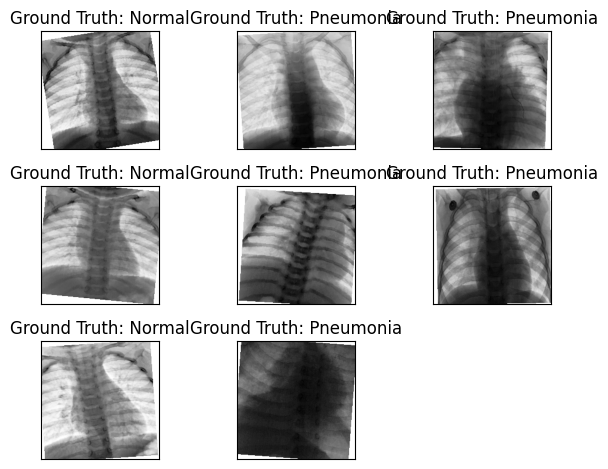

In [8]:
data = enumerate(train_dataloader)
_, (example_data, target) = data.__next__()
fig = plt.figure()
row_num = 3
col_num = 3
classes = ['Normal', 'Pneumonia']
for i in range(row_num * col_num - 1):
    plt.subplot(row_num,col_num,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='Greys')
    plt.title(f"Ground Truth: {classes[target[i]]}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


### Exploratory Data Analysis

In [9]:
def get_label_count(indices):
    label_count = {}
    for idx in indices:
        data, label = orig_dataset[idx]
        if label not in label_count:
            label_count[label] = 1
        else:
            label_count[label] += 1
            
    return label_count
        
train_label_count, val_label_count = get_label_count(indices[split:]), get_label_count(indices[:split])

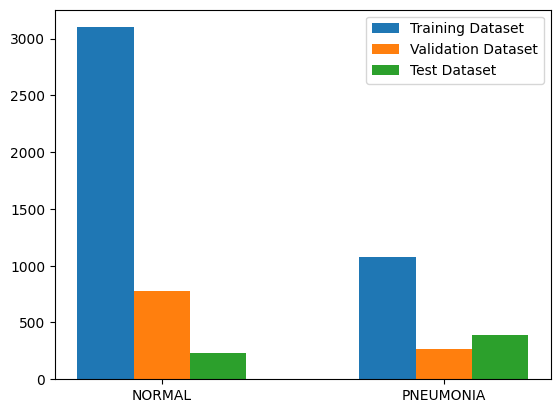

In [10]:
from collections import Counter

x = list(orig_dataset.class_to_idx)
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, train_label_count.values(), 0.2, label = 'Training Dataset')
plt.bar(x_axis, val_label_count.values(), 0.2, label = 'Validation Dataset')
plt.bar(x_axis + 0.2, Counter(test_dataset.targets).values(), 0.2, label = 'Test Dataset')

plt.xticks(x_axis, x)
plt.legend()
plt.show()